# Home Credit Default Risk

1. Introdução | Overview
2. Descrição dos dados | Data Description
3. Carregando os dados | Load data
4. Análise Exploratória | Data Exploration 

    4.1 Empréstimos - dados de treinamento | Loan - train data set
        4.1.1 Distribuição da variavel Target | Target Distribuction 
        4.1.2 Analise dos empréstimos | Loan analysis
    4.2 Analise do histórico de crédito | Todo 
        4.2.1 Crédito anteriores fornecidos por outras instituições | Todo 
        4.2.2 Crédito anteriores na Credit Bureau | Todo 
        4.2.3 Histórico mensal de emprestimo na Home Credit | Todo 
        4.2.4 Histórico mensal no cartão de crédito na Home Credit | Todo 
        4.2.5 Solicitações de crédito anteriores na Home Credit | Todo 
        4.2.6 Histórico de amortização na Home Credit | Todo 
    4.3 Todo
5. Correlação | Correlation
6. Feature Selection with Random Forest
7. ...

## 1. Introdução | Overview

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

[Home Credit Group](http://www.homecredit.net/) strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## 2. Descrição dos Dados | Data Description


* application_{train|test}.csv

    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.

* bureau.csv

    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

* bureau_balance.csv

    * Monthly balances of previous credits in Credit Bureau.
    * This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

![teste](home_credit.png)

** Pacotes | Import packages **

In [1]:
import time
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# DataViz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

%matplotlib inline
plt.style.use('ggplot')
# sns.set_style('whitegrid')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### 3. Carregando os dados | Load Data

In [2]:
def load_data(data_src):
    
    start_time = time.time()
    
    train = pd.read_csv('{}application_train.csv'.format(data_src))
    test = pd.read_csv('{}application_test.csv'.format(data_src))
    print('Train and test tables loaded.')
    
    bureau = pd.read_csv('{}bureau.csv'.format(data_src))
    bureau_bal = pd.read_csv('{}bureau_balance.csv'.format(data_src))
    print('Bureau data loaded.')
    
    prev = pd.read_csv('{}previous_application.csv'.format(data_src))
    print('Previous applications data loaded.')
    
    cred_card_bal = pd.read_csv('{}credit_card_balance.csv'.format(data_src))
    print('Credit card balance loaded.')
    
    pos_cash_bal = pd.read_csv('{}POS_CASH_balance.csv'.format(data_src))
    print('POS cash balance loaded.')
    
    ins = pd.read_csv('{}installments_payments.csv'.format(data_src))
    print('Installments data loaded.')
    
    # error if using engine c - 'utf-8' codec can't decode byte 0x85
    data_description = pd.read_csv('{}HomeCredit_columns_description.csv'.format(data_src), engine='python')
    
    print('Time it took to load all the data: {:.4f}s\n'.format(time.time() - start_time))
    
    return train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description

train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description = load_data('data/all/')

Train and test tables loaded.
Bureau data loaded.
Previous applications data loaded.
Credit card balance loaded.
POS cash balance loaded.
Installments data loaded.
Time it took to load all the data: 58.7533s



## 4. Analise Exploratória | Data Exploration

**Table Description**

In [ ]:
train_desc =  data_description[data_description['Table'] == 'application_{train|test}.csv']
train_desc[['Row', 'Description', 'Special']].head(10)

In [ ]:
# Column detail
def print_col_description(col_name):
    return(train_desc[train_desc['Row'] == col_name]['Description'].values)

print('NAME_CONTRACT_TYPE: {}'.format(print_col_description('NAME_CONTRACT_TYPE')))
print('TARGET: {}'.format(print_col_description('TARGET')))

## Todo: Realizar analise exploratoria para entender os dados 

In [ ]:
# Todo ...

# print("Values describe: ")
# print(pd.crosstab(train.ORGANIZATION_TYPE, train.TARGET))

### Missing values

In [ ]:
def missing_data(data):
    total = data.isnull().count()
    missing = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    return pd.concat([total, missing, percent], axis=1, 
                     keys=['Total', 'Missing', 'Percent']) \
                     .sort_values(by=['Percent'], ascending=False)

In [ ]:
# train dataset
missing_data(train).head(10)

In [ ]:
# test dataset
missing_data(test).head(10)

### Distribuição da variável Target | Target Distribuction

In [ ]:
# Grafico com Plotly - Vou utilizar o seaborn como principal dataviz

def graphic_target_distribution():
    trace0 = go.Bar(
                x = train[train["TARGET"]== 0]["TARGET"].value_counts().index.values,
                y = train[train["TARGET"]== 0]["TARGET"].value_counts().values,
                name='Good credit'
        )

    trace1 = go.Bar(
                x = train[train["TARGET"]== 1]["TARGET"].value_counts().index.values,
                y = train[train["TARGET"]== 1]["TARGET"].value_counts().values,
                name='Bad credit'
        )

    data = [trace0, trace1]

    layout = go.Layout(

    )

    layout = go.Layout(
        yaxis=dict(
            title='Qtde'
        ),
        xaxis=dict(
            title='Variavel de risco'
        ),
        title='Distribuição variável Target'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='grouped-bar')
    
#graphic_target_distribution()

In [ ]:
print("Distribuição da variável - Good(0) e Bad(1): ")
print(train["TARGET"].value_counts())

sns.factorplot(x ="TARGET", kind='count', data=train, size=5)
plt.title("Loan Count", fontsize=18)
plt.xlabel("Labels", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

### Qtde por feature e porcentagem de inadimplentes 

In [ ]:
def plot_stats(data, feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    #sns.set_style('whitegrid')
    
    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
plot_stats(train, 'NAME_CONTRACT_TYPE')

In [ ]:
# Distribuição de inadimplencia de acordo com a feature passada como parametro

def description_distribution(data, feature, by='TARGET'):
    return pd.crosstab(data[feature], train[by], margins=True)
    
print('Distribui')    
description_distribution(train, 'CODE_GENDER')

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(data, var,nrow=2):
    
    i = 0
    t1 = data.loc[data['TARGET'] != 0]
    t0 = data.loc[data['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(train, var,nrow=3)

## Pearson Correlation of features

In [ ]:
def plot_heatmap(dataset):
    data = [
        go.Heatmap(
            z= dataset.corr().values,
            x=dataset.columns.values,
            y=dataset.columns.values,
            colorscale='Viridis',
            reversescale = False,
            text = True ,
            opacity = 1.0 )
    ]

    layout = go.Layout(
        title='Pearson Correlation of features',
        xaxis = dict(ticks='', nticks=36),
        yaxis = dict(ticks='' ),
        width = 900, height = 700,
    margin=dict(
        l=240,
    ),)

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='labelled-heatmap')

plot_heatmap(train)

In [ ]:
def plot_sns_heatmap():
    colormap = plt.cm.Greens
    plt.figure(figsize=(14,12))

    sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
                 cmap = colormap, linecolor='white'
               #, square=True, annot=True
               )
    return plt.show()
    
#plot_sns_heatmap()

## Feature Importance using Random forest

In [10]:
# print(train.info())

# print(train.nunique())

#categorical_feats = [f for f in train.columns if train[f].dtype == 'object']
train[categorical_feats].head()


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,3,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,3,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,0,1,7,2
3,0,0,0,1,6,7,4,0,1,8,6,5,0,1,7,2
4,0,1,0,1,6,7,4,3,1,3,4,37,0,1,7,2


In [9]:
# Trasnforma as variaveis categoricas/string numero - label encoder

categorical_feats = [f for f in train.columns if train[f].dtype == 'object']

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lb.transform(list(train[col].values.astype('str')))
    test[col] = lb.transform(list(test[col].values.astype('str')))
    
train.fillna(-999, inplace = True)
test.fillna(-999, inplace = True)

rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(train.drop(['SK_ID_CURR', 'TARGET'],axis=1), train.TARGET)
features = train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values



In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

## Feature Selection

In [14]:
# Todo: Realizar a seleção das variaveis para o modelo

melhores_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'NAME_EDUCATION_TYPE', 'DAYS_ID_PUBLISH', 'CODE_GENDER', 
                     'AMT_ANNUITY', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                    'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE']

melhores_features2 = ['TOTALAREA_MODE',
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'HOUR_APPR_PROCESS_START',
                     'OWN_CAR_AGE',
                     'REGION_POPULATION_RELATIVE',
                     'FLAG_DOCUMENT_3',
                     'AMT_INCOME_TOTAL',
                     'NAME_INCOME_TYPE',
                     'DAYS_LAST_PHONE_CHANGE',
                     'ORGANIZATION_TYPE',
                     'AMT_CREDIT',
                     'AMT_GOODS_PRICE',
                     'DAYS_REGISTRATION',
                     'AMT_ANNUITY',
                     'CODE_GENDER',
                     'DAYS_ID_PUBLISH',
                     'NAME_EDUCATION_TYPE',
                     'DAYS_EMPLOYED',
                     'DAYS_BIRTH',
                     'EXT_SOURCE_1',
                     'EXT_SOURCE_3',
                     'EXT_SOURCE_2']

**Balancing Classes**

In [82]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [75]:
# RESAMPLE - DOWNSAPLED

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=24825,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

df_downsampled.shape

(49650, 122)

In [84]:
# RESAMPLE - UPSAMPLED

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=282686,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

## Construindo os modelos

In [107]:
from sklearn import model_selection

# Com os dados train unbalanced
# X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = train['TARGET']

# Com os dados balanced - aplicado resample downsampled
# X = df_downsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = df_downsampled['TARGET']

# Com os dados balanced - aplicado resample upsampled
X = df_upsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
Y = df_upsampled['TARGET']

teste_size = 0.3
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= teste_size, random_state = seed)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

resultado = model1.score(X_test, Y_test)

print(resultado)

0.992824800132


In [ ]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

num_folds = 10
num_instances = len(X_train)
seed = 7

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('RF', RandomForestClassifier()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


## Validação dos modelos

In [108]:
rf = model1 # modelos[3][1]

# rf.fit(X_train, Y_train)

In [109]:
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(Y_test,y_pred))
print("\n")
print(confusion_matrix(Y_test, y_pred))
print("\n")
print(fbeta_score(Y_test, y_pred, beta=2))
print("\n")
print(classification_report(Y_test, y_pred))

0.992824800132


[[83461  1152]
 [   65 84934]]


0.996686083899


             precision    recall  f1-score   support

          0       1.00      0.99      0.99     84613
          1       0.99      1.00      0.99     84999

avg / total       0.99      0.99      0.99    169612



In [21]:
#Testing the model 
#Predicting using our  model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model


y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(Y_test,y_pred))
print("\n")
print(confusion_matrix(Y_test, y_pred))
print("\n")
print(fbeta_score(Y_test, y_pred, beta=2))
print("\n")
print(classification_report(Y_test, y_pred))

0.919288052551


[[84797    10]
 [ 7436    11]]


0.00184508034486


             precision    recall  f1-score   support

          0       0.92      1.00      0.96     84807
          1       0.52      0.00      0.00      7447

avg / total       0.89      0.92      0.88     92254



**Confusion Matrix**

Confusion matrix, without normalization
[[84282   331]
 [   33 84966]]


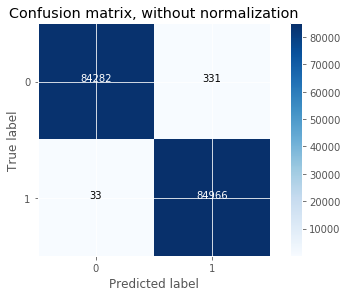

In [90]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

**ROC Curve**

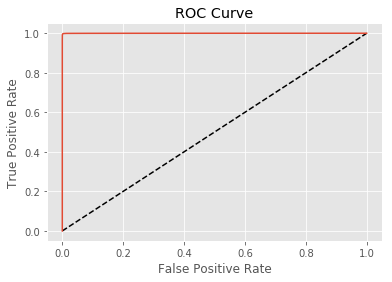

In [110]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

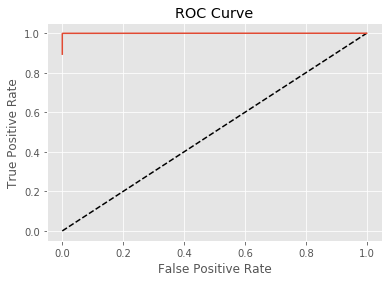

In [105]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Salva modelo no disco rigido**

In [ ]:
import pickle

# Salvando o modelo
arquivo = 'modelo_v1.sav'
pickle.dump(modelo, open(arquivo, 'wb'))

# Carregando o arquivo
modelo_v1 = pickle.load(open(arquivo, 'rb'))
resultado = modelo_v1.score(X_teste, Y_teste)

In [118]:
df_resultado = pd.DataFrame()

df_resultado['SK_ID_CURR'] = test['SK_ID_CURR']
test_predict = test.drop('SK_ID_CURR', axis=1)

test_predict.head()

df_resultado['TARGET'] = rf.predict(test_predict)

df_resultado.to_csv('resultado.csv', index=False)

## RASCUNHO

In [ ]:
temp = train["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Organization Name', yTitle = "Count", 
           title = 'Types of Organizations who applied for loan ', color = 'red')

In [ ]:
# Criando o data set por Tipo de Organização

def create_score_organization_type():

    temp = pd.DataFrame(train.groupby(['ORGANIZATION_TYPE', 'TARGET']).size())
    temp.reset_index(inplace=True)
    temp.rename(columns = {0:'Qtde'}, inplace = True)

    score_organization = pd.pivot_table(temp,index=['ORGANIZATION_TYPE'], columns=['TARGET'], 
                                        values=['Qtde'], aggfunc=[np.sum], fill_value=0, margins=True)
    score_organization.reset_index(inplace=True)
    score_organization.rename(columns={ 0:'good_credit', 1:'bad_credit'}, inplace=True)
    score_organization = score_organization.sort_values(by=[('sum', 'Qtde', 'All')], ascending=False)[1:len(score_organization)]

    return score_organization

score_organization = create_score_organization_type()


In [ ]:
trace1 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'good_credit')],
    name = 'Good'
)
trace2 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'bad_credit')],
    name = 'Bad'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack', 
    title='Contratos por Tipo de Organização'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [ ]:
temp = train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')